In [1]:
import pandas as pd
import numpy as np

In [ ]:
#import os
# print(os.getcwd()) #to check which directory i'm working on 


c:\Users\DELL\Desktop\outsidescholl projects for fun\recommender System\Computer-Vision---Project\notebooks


In [ ]:
#print(os.listdir())               # top level
#print(os.listdir("../data"))         # check "data" folder
#print(os.listdir("../data/ml-1m"))   # check inside


['.ipynb_checkpoints', 'CF.ipynb']
['ml-1m', 'movieLens']
['movies.dat', 'ratings.dat', 'README', 'users.dat']


In [2]:
movies = pd.read_csv(      #by default pd.read_csv uses utf-8 encoding but the data set uses latin-1
    '../data/ml-1m/movies.dat',  
    sep='::',
    engine='python',
    encoding="latin-1",
    names=['movieId','title','genres']
)


In [3]:
movies.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [4]:
import pandas as pd

ratings = pd.read_csv(
    "../data/ml-1m/ratings.dat",
    sep="::",
    engine="python",
    names=["userId", "movieId", "rating", "timestamp"],
    encoding="latin-1"
)

print(ratings.head())


   userId  movieId  rating  timestamp
0       1     1193       5  978300760
1       1      661       3  978302109
2       1      914       3  978301968
3       1     3408       4  978300275
4       1     2355       5  978824291


In [5]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  3883 non-null   int64 
 1   title    3883 non-null   object
 2   genres   3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [6]:
movies.describe()

,movieId
count,3883.000000
mean,1986.049446
std,1146.778349
min,1.000000
25%,982.500000
50%,2010.000000
75%,2980.500000
max,3952.000000


In [7]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   userId     1000209 non-null  int64
 1   movieId    1000209 non-null  int64
 2   rating     1000209 non-null  int64
 3   timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


In [8]:
ratings.describe()

,userId,movieId,rating,timestamp
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,1.865540e+03,3.581564e+00,9.722437e+08
std,1.728413e+03,1.096041e+03,1.117102e+00,1.215256e+07
min,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08
25%,1.506000e+03,1.030000e+03,3.000000e+00,9.653026e+08
50%,3.070000e+03,1.835000e+03,4.000000e+00,9.730180e+08
75%,4.476000e+03,2.770000e+03,4.000000e+00,9.752209e+08
max,6.040000e+03,3.952000e+03,5.000000e+00,1.046455e+09


In [9]:
import matplotlib.pyplot as plt

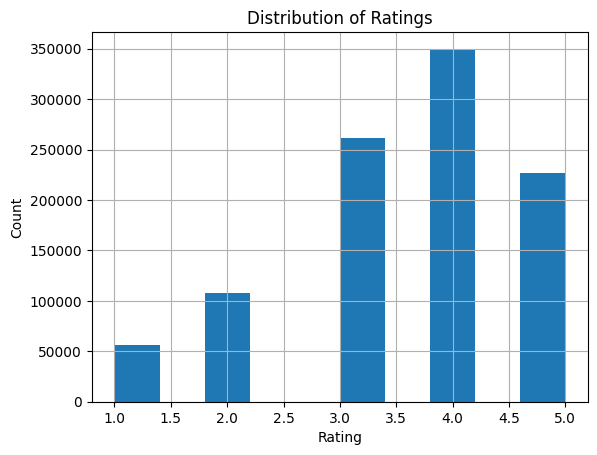

In [10]:

ratings["rating"].hist()
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Distribution of Ratings")
plt.show()


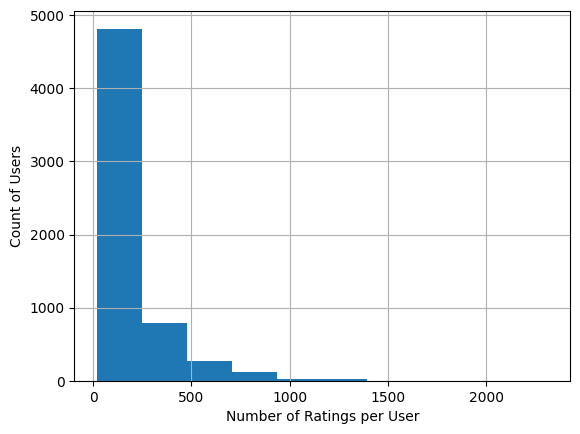

In [11]:
ratings.groupby("userId")["rating"].count().hist()
plt.xlabel("Number of Ratings per User")
plt.ylabel("Count of Users")
plt.show()


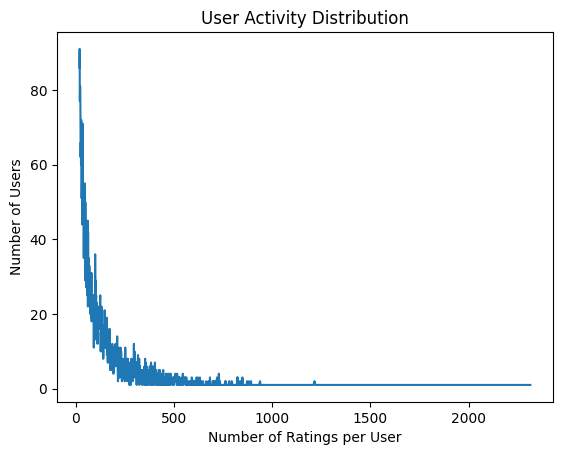

In [12]:
# rest a comprendre 
import matplotlib.pyplot as plt

# Count how many ratings each user has
ratings_per_user = ratings.groupby("userId")["rating"].count()

# Count how many users have each possible number of ratings
user_activity = ratings_per_user.value_counts().sort_index()

# Line plot
plt.plot(user_activity.index, user_activity.values)
plt.xlabel("Number of Ratings per User")
plt.ylabel("Number of Users")
plt.title("User Activity Distribution")
plt.show()


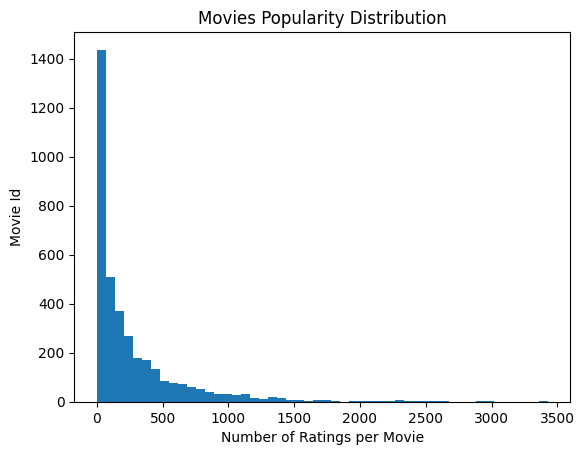

Most rated movies:
 movieId
2858    3428
260     2991
1196    2990
1210    2883
480     2672
Name: rating, dtype: int64


In [16]:
movie_counts = ratings.groupby("movieId")["rating"].count().sort_values(ascending=False)

plt.hist(movie_counts, bins=50)
plt.xlabel("Number of Ratings per Movie")
plt.ylabel("Movie Id")
plt.title("Movies Popularity Distribution")
plt.show()

print("Most rated movies:\n", movie_counts.head())


In [13]:
movie_means = ratings.groupby("movieId")["rating"].mean()
print(movie_means.describe())


count    3706.000000
mean        3.238892
std         0.672925
min         1.000000
25%         2.822705
50%         3.331546
75%         3.740741
max         5.000000
Name: rating, dtype: float64


In [14]:
all_genres = []
for g in movies["genres"]:
    all_genres.extend(g.split("|"))


In [15]:
from collections import Counter
genre_counts = Counter(all_genres)

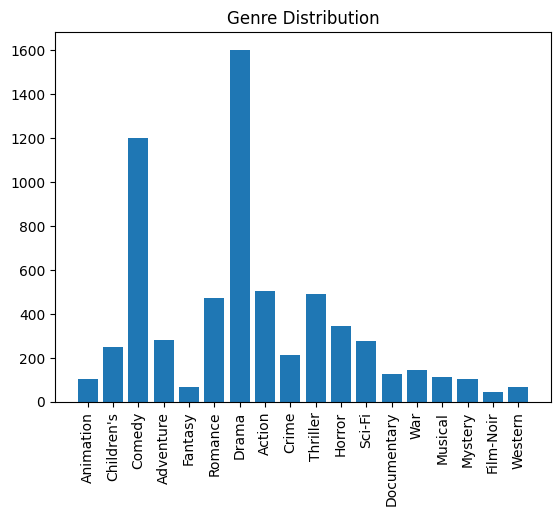

In [16]:
plt.bar(genre_counts.keys(), genre_counts.values())
plt.xticks(rotation=90)
plt.title("Genre Distribution")
plt.show()

In [ ]:
### building the R matrice

In [42]:
R = ratings.pivot(index="userId", columns="movieId", values="rating")


In [ ]:
#from surprise import Dataset, Reader, SVD, accuracy

In [ ]:
#from surprise.model_selection import train_test_split

In [ ]:

# Fill NaNs with 0 (basic approach, but you could also use user/movie mean)
#R_filled = R.fillna(0).values


In [ ]:
#from scipy.sparse.linalg import svds

In [ ]:
#k=50 #latent factor

In [ ]:
#U, sigma, Vt = svds(R_filled, k=k)

In [ ]:
# sigma comes as a 1D array, convert to diagonal matrix
#sigma = np.diag(sigma)

In [ ]:
# Predicted ratings matrix
#R_hat = np.dot(np.dot(U, sigma), Vt)

In [ ]:
# Convert back to DataFrame for easy lookup
#R_hat_df = pd.DataFrame(R_hat, index=R.index, columns=R.columns)

In [ ]:
#making predictions 

In [ ]:
#user_id = 1

# Actual ratings
#user_ratings = R.loc[user_id]

# Predicted ratings
#user_predictions = R_hat_df.loc[user_id]

# Movies not rated yet
#unrated = user_ratings[user_ratings.isnull()].index

# Sort predicted scores for unrated movies
#recommendations = user_predictions.loc[unrated].sort_values(ascending=False).head(10)

#print(recommendations)


movieId
318     2.778118
34      2.667867
364     2.589135
2081    2.185524
1282    1.879941
2080    1.735500
2096    1.701037
2078    1.675123
2087    1.654565
356     1.653695
Name: 1, dtype: float64


In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
# Flatten actual and predicted
#actual = R.values.flatten()
#predicted = R_hat_df.values.flatten()

# Keep only non-NaN entries from original
#mask = ~np.isnan(R.values.flatten())
#actual_known = actual[mask]
#predicted_known = predicted[mask]

#mse = mean_squared_error(actual_known, predicted_known)

# RMSE = sqrt(MSE)
#rmse = np.sqrt(mse)

# MAE
#mae = mean_absolute_error(actual_known, predicted_known)

#print(f"RMSE: {rmse:.4f}")
#print(f"MAE: {mae:.4f}")


RMSE: 2.2374
MAE: 1.9117


In [ ]:
#import numpy as np
#import pandas as pd
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import mean_squared_error, mean_absolute_error
#from scipy.sparse.linalg import svds

# ---- 1. Prepare ratings data ----
# ratings DataFrame should have: userId, movieId, rating
#ratings = ratings[['userId','movieId','rating']]

# Split into train/test
#train, test = train_test_split(ratings, test_size=0.2, random_state=42)

# Build pivot table for training data
#R_train = train.pivot(index="userId", columns="movieId", values="rating").fillna(0)
#R_filled = R_train.values

# ---- 2. Perform SVD on training matrix ----
#k = 10  # number of latent factors
#U, sigma, Vt = svds(R_filled, k=k)
#sigma = np.diag(sigma)

# Predicted ratings for training users
#R_hat_train = np.dot(np.dot(U, sigma), Vt)
#R_hat_df = pd.DataFrame(R_hat_train, index=R_train.index, columns=R_train.columns)

# ---- 3. Evaluate on test set ----
#preds, actuals = [], []
#for row in test.itertuples(index=False):
#    u, m, r = row
#   if u in R_hat_df.index and m in R_hat_df.columns:
#        preds.append(R_hat_df.loc[u, m])
#        actuals.append(r)

# Metrics
#rmse = np.sqrt(mean_squared_error(actuals, preds))
#mae = mean_absolute_error(actuals, preds)

#print(f"Test RMSE: {rmse:.4f}")
#print(f"Test MAE: {mae:.4f}")


Test RMSE: 2.7703
Test MAE: 2.5077


In [18]:
from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import accuracy

# Convert to Surprise format
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

# Train/test split
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Train SVD model
algo = SVD()
algo.fit(trainset)

# Test predictions
predictions = algo.test(testset)

# Evaluate
rmse = accuracy.rmse(predictions)
mae = accuracy.mae(predictions)


RMSE: 0.8734
MAE:  0.6855


In [19]:
from surprise import SVD, Dataset, Reader
from surprise.model_selection import cross_validate

# Load ratings into Surprise
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

# SVD model
algo = SVD()

# 5-fold cross-validation
results = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8726  0.8732  0.8751  0.8765  0.8741  0.8743  0.0014  
MAE (testset)     0.6858  0.6851  0.6869  0.6881  0.6862  0.6864  0.0010  
Fit time          15.67   11.47   11.68   11.53   11.87   12.44   1.62    
Test time         1.62    1.25    1.62    1.60    1.29    1.48    0.17    


In [23]:
from surprise.model_selection import GridSearchCV

param_grid = {
    'n_factors': [50, 100, 150],
    'n_epochs': [20, 30, 50],
    'lr_all': [0.002, 0.005, 0.01],
    'reg_all': [0.02, 0.05, 0.1]
}

gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3, n_jobs=-1)
gs.fit(data)

print("Best RMSE:", gs.best_score['rmse'])
print("Best params:", gs.best_params['rmse'])


Best RMSE: 0.8632426459124406
Best params: {'n_factors': 150, 'n_epochs': 50, 'lr_all': 0.005, 'reg_all': 0.05}


In [20]:
import random

# Pick a random user from your dataset
user_id = random.choice(ratings['userId'].unique())
print("Random User:", user_id)


Random User: 3467


In [22]:
# Movies this user has rated
user_rated = ratings[ratings['userId'] == user_id]
print("User has rated:", len(user_rated), "movies")

# Let's see their top favorites (ratings ≥ 4.5, for example)
user_favs = user_rated[user_rated['rating'] >= 4.5].merge(movies, on='movieId')
print("User favorites:")
display(user_favs[['title', 'rating']].sort_values('rating', ascending=False).head(10))

User has rated: 59 movies
User favorites:


,title,rating
0,Duck Soup (1933),5
13,"Shawshank Redemption, The (1994)",5
23,Platoon (1986),5
22,Harold and Maude (1971),5
21,"Grand Day Out, A (1992)",5
20,Full Metal Jacket (1987),5
19,GoodFellas (1990),5
18,Airplane! (1980),5
17,And Now for Something Completely Different (1971),5
16,Twelve Monkeys (1995),5


In [23]:
# All movie IDs
all_movie_ids = ratings['movieId'].unique()

# Movies not yet rated by this user
unseen_movies = set(all_movie_ids) - set(user_rated['movieId'])

# Predict ratings for unseen movies
predictions = [ (mid, algo.predict(user_id, mid).est) for mid in unseen_movies ]


In [24]:
# Sort predictions by estimated rating
top_10 = sorted(predictions, key=lambda x: x[1], reverse=True)[:10]

# Convert to DataFrame with movie titles
top_10_df = pd.DataFrame(top_10, columns=['movieId', 'predicted_rating']).merge(movies, on='movieId')
print("Top 10 Recommendations for User", user_id)
display(top_10_df[['title', 'predicted_rating']])


Top 10 Recommendations for User 3467


,title,predicted_rating
0,Sanjuro (1962),4.836661
1,"Matrix, The (1999)",4.818095
2,Gladiator (2000),4.793514
3,"Green Mile, The (1999)",4.715225
4,42 Up (1998),4.708585
5,Saving Private Ryan (1998),4.635151
6,"Hunt for Red October, The (1990)",4.633670
7,"Patriot, The (2000)",4.624973
8,Three Colors: Blue (1993),4.602201
9,After Life (1998),4.585068


In [25]:
overlap = set(user_favs['title']) & set(top_10_df['title'])
print("Overlap between user favorites and recommendations:", overlap)


Overlap between user favorites and recommendations: set()


In [27]:
from collections import defaultdict

def get_top_n(predictions, n=10):
    # Map predictions to user -> list of (movieId, est_rating)
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))
    
    # Keep top-n per user
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]
    
    return top_n

# Get predictions on test set
predictions = algo.test(testset)

# Build top-10 per user
top_n = get_top_n(predictions, n=10)

# Example: top-10 recommendations for a random user
user_id = random.choice(list(top_n.keys()))
print("Top 10 recommendations for user", user_id)
print(top_n[user_id])


Top 10 recommendations for user 1710
[(1274, 4.770435312331635), (2976, 4.68345880968849), (2959, 4.571297266239715), (260, 4.55188237657879), (2762, 4.446154314342964), (101, 4.296791505248529), (2716, 4.186132077974248), (1, 3.6882781426717006), (180, 3.567134835583285), (785, 3.468714790247282)]


In [28]:
# Convert top_n for one user into DataFrame
top10_df = pd.DataFrame(top_n[user_id], columns=['movieId', 'predicted_rating'])

# Merge with movies metadata
top10_df = top10_df.merge(movies[['movieId','title']], on='movieId')

print("Top 10 recommendations for user", user_id)
display(top10_df[['title','predicted_rating']])


Top 10 recommendations for user 1710


,title,predicted_rating
0,Akira (1988),4.770435
1,Bringing Out the Dead (1999),4.683459
2,Fight Club (1999),4.571297
3,Star Wars: Episode IV - A New Hope (1977),4.551882
4,"Sixth Sense, The (1999)",4.446154
5,Bottle Rocket (1996),4.296792
6,Ghostbusters (1984),4.186132
7,Toy Story (1995),3.688278
8,Mallrats (1995),3.567135
9,Kingpin (1996),3.468715


In [29]:
# Pick a user
user_id = 3467  # or any ID from ratings['userId'].unique()

# Get this user's actual ratings
user_rated = ratings[ratings['userId'] == user_id].merge(movies[['movieId','title']], on='movieId')

# Predict ratings for those same movies
preds = []
for row in user_rated.itertuples(index=False):
    mid, true_rating = row.movieId, row.rating
    est_rating = algo.predict(user_id, mid).est
    preds.append((mid, row.title, true_rating, est_rating))

# Create DataFrame for comparison
compare_df = pd.DataFrame(preds, columns=['movieId','title','actual_rating','predicted_rating'])

# Show side by side
print(f"Predicted vs Actual ratings for User {user_id}")
display(compare_df.sort_values('actual_rating', ascending=False).head(10))


Predicted vs Actual ratings for User 3467


,movieId,title,actual_rating,predicted_rating
58,1240,"Terminator, The (1984)",5,4.285749
45,32,Twelve Monkeys (1995),5,3.914055
1,1256,Duck Soup (1933),5,4.334934
28,3835,"Crush, The (1993)",5,3.607758
26,1148,"Wrong Trousers, The (1993)",5,4.523020
36,1197,"Princess Bride, The (1987)",5,4.192525
37,3114,Toy Story 2 (1999),5,4.735368
40,3196,Stalag 17 (1953),5,4.398716
42,318,"Shawshank Redemption, The (1994)",5,4.762639
43,329,Star Trek: Generations (1994),5,3.842186
